<a href="https://colab.research.google.com/github/NathanSilvaXavier/Projetos-Python-/blob/main/Dividendos_WEGE3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


# **Importando dados WEGE3**

In [ ]:
papel =  yf.Ticker('WEGE3.SA')
dados = papel.history(start = '2010-11-30' , end = '2022-11-30')


### *Plot do histórico de pagamentos de dividendos para inspecionar os dados visualmente*

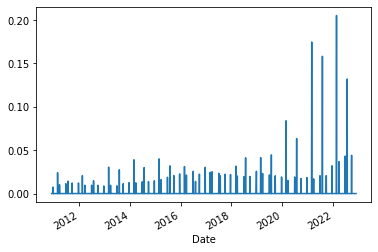

In [ ]:
dados.Dividends.plot()

## *Criamos 3 colunas no nosso dataframe para especificar o mês, ano , e o mês-ano*

In [ ]:
dados['month'] = dados.index.month
dados['year'] = dados.index.year
dados['year_month'] = dados['year'].astype(str) + "-" + dados['month'].astype(str)

# Qual o soma de dividendos que WEG pagou por ano?

In [ ]:
dados.groupby(['year'])['Dividends'].sum()

year
2010    0.007396
2011    0.084231
2012    0.073076
2013    0.100130
2014    0.123241
2015    0.150136
2016    0.144652
2017    0.137596
2018    0.157902
2019    0.170210
2020    0.217194
2021    0.423000
2022    0.461327
Name: Dividends, dtype: float64

# *Gráfico de tendência de pagamentos ao longo do tempo*

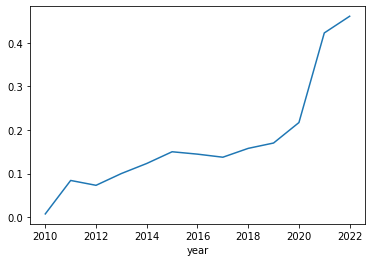

In [ ]:
dados.groupby(['year'])['Dividends'].sum().plot()

# No intervalo analisado, qual a soma dos dividendos pagos por mês?

In [ ]:
dados.groupby(['month'])['Dividends'].sum()

month
1     0.000000
2     0.515802
3     0.447019
4     0.000000
5     0.000000
6     0.170753
7     0.484132
8     0.172138
9     0.212239
10    0.022353
11    0.000000
12    0.225655
Name: Dividends, dtype: float64

# Quantas vezes WEGE3 paga dividendos por ano , normalmente?

In [ ]:
dadosfiltrados = dados[dados.Dividends !=0]
dadosfiltrados.groupby([ 'year' ])['Dividends'].count()

year
2010    1
2011    6
2012    6
2013    6
2014    6
2015    6
2016    6
2017    6
2018    6
2019    6
2020    6
2021    6
2022    5
Name: Dividends, dtype: int64

# Nos últimos 10 anos, quantas vezes foram pagos proventos por mês, ao todo?

In [ ]:
dadosfiltrados.groupby([ 'month' ])['Dividends'].count()

month
2      9
3     15
6      9
7     13
8      2
9     11
10     1
12    12
Name: Dividends, dtype: int64

# **Dividend Yield (DY)**

In [ ]:
preco_final = yf.download('WEGE3.SA' , start = '2022-11-29')['Close'][-1]

[*********************100%***********************]  1 of 1 completed


In [ ]:
dados = papel.history(start = '2021-11-30' , end = '2022-11-30')
dadosfiltrados = dados[dados.Dividends !=0]

In [ ]:
soma_dividendos = sum(dadosfiltrados.Dividends)

In [ ]:
(soma_dividendos/preco_final)*100

1.3120399468620767